In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import stats
%matplotlib inline

In [4]:
plt.rcParams['figure.figsize']=(10,5)
comp=pd.read_csv("1000_Companies.csv")
comp

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [5]:
X=comp['Marketing Spend'].values
Y=comp['Profit'].values

In [6]:
X

array([471784.1    , 443898.53   , 407934.54   , 383199.62   ,
       366168.42   , 362861.36   , 127716.82   , 323876.68   ,
       311613.29   , 304981.62   , 229160.95   , 249744.55   ,
       249839.44   , 252664.93   , 256512.92   , 261776.23   ,
       264346.06   , 282574.31   , 294919.57   ,      0.     ,
       298664.47   , 299737.29   , 303319.26   , 304768.73   ,
       140574.81   , 137962.62   , 134050.07   , 353183.81   ,
       118148.2    , 107138.38   ,  91131.24   ,  88218.23   ,
        46085.25   , 214634.81   , 210797.67   , 205517.64   ,
       201126.82   , 197029.42   , 185265.1    , 174999.3    ,
       172795.67   , 164470.71   , 148001.11   ,  35534.17   ,
        28334.72   ,   1903.93   , 297114.46   ,      0.     ,
            0.     ,  45173.06   , 236937.1317 , 143589.7191 ,
       242316.5853 , 195132.5255 , 160862.6275 , 128099.6711 ,
       216156.3873 , 346478.8607 , 121415.8737 , 341016.4385 ,
       316407.5606 , 216694.7185 , 151917.4528 , 186391

In [7]:
Y

array([192261.83   , 191792.06   , 191050.39   , 182901.99   ,
       166187.94   , 156991.12   , 156122.51   , 155752.6    ,
       152211.77   , 149759.96   , 146121.95   , 144259.4    ,
       141585.52   , 134307.35   , 132602.65   , 129917.04   ,
       126992.93   , 125370.37   , 124266.9    , 122776.86   ,
       118474.03   , 111313.02   , 110352.25   , 108733.99   ,
       108552.04   , 107404.34   , 105733.54   , 105008.31   ,
       103282.38   , 101004.64   ,  99937.59   ,  97483.56   ,
        97427.84   ,  96778.92   ,  96712.8    ,  96479.51   ,
        90708.19   ,  89949.14   ,  81229.06   ,  81005.76   ,
        78239.91   ,  77798.83   ,  71498.49   ,  69758.98   ,
        65200.33   ,  64926.08   ,  49490.75   ,  42559.73   ,
        35673.41   ,  14681.4    , 123485.2464 ,  82155.48418,
       125867.0108 , 104976.1696 ,  89803.10053,  75297.23305,
       114284.5283 , 171985.0761 ,  72337.96774, 169566.5772 ,
       158670.9451 , 114522.8756 ,  85842.60573, 101106

# FORMULA BASED MODEL

In [8]:
xmean=np.mean(X)
ymean=np.mean(Y)

z=len(X)

N=0
D=0
for i in range(z):
    N += (X[i]-xmean)*(Y[i]-ymean)
    D += (X[i]-xmean)**2
    
#slope
M=N/D

#intercept
C=ymean-(M*xmean)

display(M,C)

0.42958238539304233

22372.45607207653

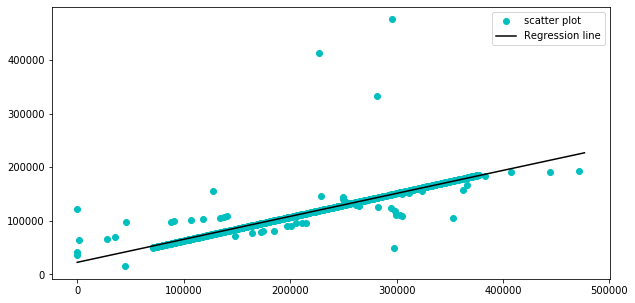

In [21]:
x=np.array(X)
y=np.array(Y)

mn=np.min(x)
mx=np.max(y)
x1=np.linspace(mn,mx,500)
y1=M*x1+C

plt.plot(x,y,'co',label='scatter plot')
plt.plot(x1,y1,'-k',label='Regression line')

plt.legend()


In [23]:
sum_of_square=0
sum_of_residual=0

for i in range(z):
    ypredict= C+ M*X[i]
    sum_of_square+=(Y[i]-ymean)**2
    sum_of_residual+=(Y[i]-ypredict)**2
    
    
rsquare=1-(sum_of_residual/sum_of_square)
rsquare*100

array([84.1384577])

# SCIKIT-LEARN BASED MODEL

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Reshaping data

X=X.reshape((z,1))

#creating model

reg= LinearRegression()

#Fitting data

reg=reg.fit(X,Y)

#predicting model

ypredicted=reg.predict(X)

#calculating R square value

Rsquare=reg.score(X,Y)
display(Rsquare)
Rsquare*100

0.841384577048961

84.1384577048961

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

#creating model

from sklearn.linear_model import LinearRegression
reg= LinearRegression()

#Fiting data

reg=reg.fit(X_train,Y_train)

#predicting model

ypredicted=reg.predict(X_test)

In [14]:
reg.coef_

array([0.42871309])

In [15]:
reg.intercept_

22348.358580625514

In [16]:
from sklearn.metrics import r2_score
r2_score(Y_test,ypredicted)

0.7273740674168179